<h1 align='center' style='color:#14213d'>Mapping with GeoPandas</h1>

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(type(world))
world.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


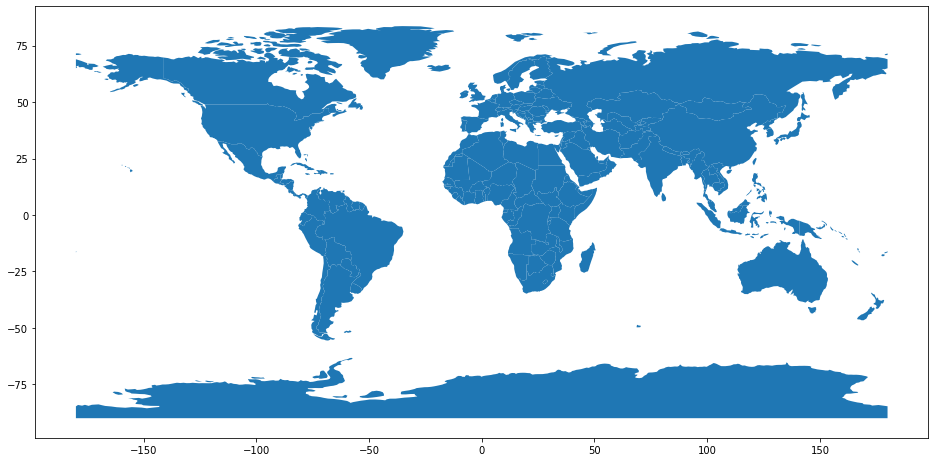

In [3]:
fig, ax = plt.subplots(1, figsize = (16, 8))
world.plot(ax=ax)
plt.savefig('Plot/World1.jpg');

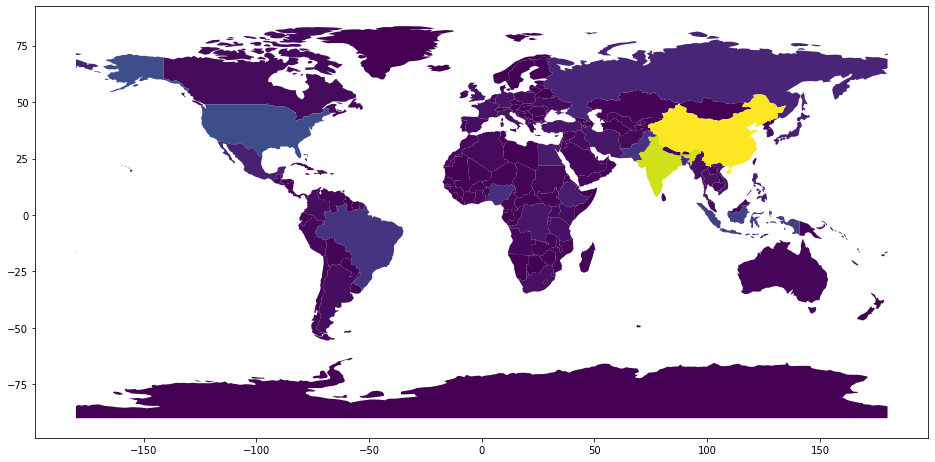

In [4]:
world = world[world.name != "Antartica"]
fig, ax = plt.subplots(1, figsize = (16, 8))
world.plot(column='pop_est', ax=ax)
plt.savefig('Plot/World2.jpg');

#### Data:- `https://www.kaggle.com/worldbank/world-development-indicators`

In [5]:
df = pd.read_csv('Data/Indicators.csv')
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [6]:
for i in df['IndicatorName'].unique(): 
    print(i)

Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Arms exports (SIPRI trend indicator values)
Arms imports (SIPRI trend indicator values)
Birth rate, crude (per 1,000 people)
CO2 emissions (kt)
CO2 emissions (metric tons per capita)
CO2 emissions from gaseous fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions from solid fuel consumption (% of total)
Death rate, crude (per 1,000 people)
Fertility rate, total (births per woman)
Fixed telephone subscriptions
Fixed telephone subscriptions (per 100 people)
Hospital beds (per 1,000 people)
International migrant stock (% of population)
International migrant stock, total
Life expectancy at birth, female (years)
Life expectancy at birth, male (years)
Life expectancy at birth,

PPG, IDA (DIS, current US$)
PPG, IDA (DOD, current US$)
PPG, IDA (INT, current US$)
PPG, IDA (NTR, current US$)
PPG, IDA (TDS, current US$)
PPG, multilateral (AMT, current US$)
PPG, multilateral (DIS, current US$)
PPG, multilateral (DOD, current US$)
PPG, multilateral (INT, current US$)
PPG, multilateral (NTR, current US$)
PPG, multilateral concessional (AMT, current US$)
PPG, multilateral concessional (DIS, current US$)
PPG, multilateral concessional (DOD, current US$)
PPG, multilateral concessional (INT, current US$)
PPG, multilateral concessional (NFL, current US$)
PPG, multilateral concessional (NTR, current US$)
PPG, multilateral concessional (TDS, current US$)
PPG, official creditors (AMT, current US$)
PPG, official creditors (DIS, current US$)
PPG, official creditors (DOD, current US$)
PPG, official creditors (INT, current US$)
PPG, official creditors (NFL, current US$)
PPG, official creditors (NTR, current US$)
PPG, official creditors (TDS, current US$)
PPG, other private credi

Diarrhea treatment (% of children under 5 receiving oral rehydration and continued feeding)
Female headed households (% of households with a female head)
Low-birthweight babies (% of births)
Employment to population ratio, 15+, female (%) (modeled ILO estimate)
Employment to population ratio, 15+, male (%) (modeled ILO estimate)
Employment to population ratio, 15+, total (%) (modeled ILO estimate)
Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)
Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)
Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)
Prevalence of undernourishment (% of population)
Unemployment, female (% of female labor force)
Unemployment, male (% of male labor force)
Unemployment, total (% of total labor force)
Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)
Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)
Unemployment, 

In [7]:
bird_df = df[(df['IndicatorName'] == 'Bird species, threatened') & (df['Year'] == 2015)].copy()
bird_df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5641696,Arab World,ARB,"Bird species, threatened",EN.BIR.THRD.NO,2015,297.0
5641741,Caribbean small states,CSS,"Bird species, threatened",EN.BIR.THRD.NO,2015,66.0
5641792,Central Europe and the Baltics,CEB,"Bird species, threatened",EN.BIR.THRD.NO,2015,130.0
5641837,East Asia & Pacific (all income levels),EAS,"Bird species, threatened",EN.BIR.THRD.NO,2015,1095.0
5641882,East Asia & Pacific (developing only),EAP,"Bird species, threatened",EN.BIR.THRD.NO,2015,739.0


In [8]:
countries_b = bird_df.CountryCode.unique()
countries_w = world.iso_a3.unique()

for iso in countries_w:
    if iso not in countries_b:
        print(world[world['iso_a3'] == iso][['name','iso_a3']].values)

[['W. Sahara' 'ESH']]
[['Dem. Rep. Congo' 'COD']]
[['Falkland Is.' 'FLK']]
[['Norway' '-99']
 ['France' '-99']
 ['N. Cyprus' '-99']
 ['Somaliland' '-99']
 ['Kosovo' '-99']]
[['Fr. S. Antarctic Lands' 'ATF']]
[['Timor-Leste' 'TLS']]
[['Palestine' 'PSE']]
[['Romania' 'ROU']]
[['Taiwan' 'TWN']]
[['Antarctica' 'ATA']]


In [9]:
idx = bird_df.CountryName.str.contains('Congo')
bird_df[idx]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5646213,"Congo, Dem. Rep.",ZAR,"Bird species, threatened",EN.BIR.THRD.NO,2015,37.0
5646291,"Congo, Rep.",COG,"Bird species, threatened",EN.BIR.THRD.NO,2015,5.0


In [10]:
idx = world.name.str.contains('Congo')
world[idx]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
67,4954674,Africa,Congo,COG,30270.0,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ..."


In [11]:
new_code = {'CountryCode':{'ZAR': 'COD', 'ROM':'ROU', 'TMP':'TLS'}}

# replace
bird_df.replace(new_code, inplace= True)

# Check for congo

idx = bird_df.CountryName.str.contains('Congo')
bird_df[idx]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5646213,"Congo, Dem. Rep.",COD,"Bird species, threatened",EN.BIR.THRD.NO,2015,37.0
5646291,"Congo, Rep.",COG,"Bird species, threatened",EN.BIR.THRD.NO,2015,5.0


In [12]:
#rename code column and drop rows with empty cells
bird_df.rename({'CountryCode':'iso_a3'}, axis = 1, inplace=True)
bird_df = bird_df[['iso_a3', 'Value']].dropna()

#merge dataframes and filter columns
world_values = world.merge(bird_df, how='inner', on='iso_a3', copy = True)
world_values = world_values[['iso_a3', 'geometry', 'Value']]

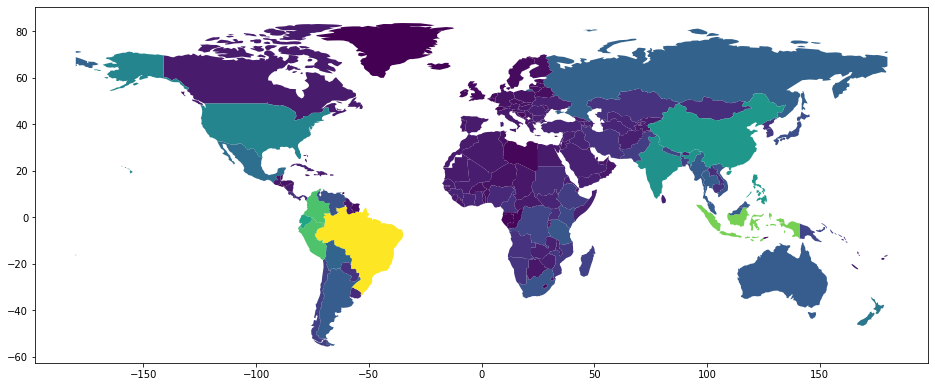

In [13]:
fig, ax = plt.subplots(1, figsize = (16, 8))
world_values.plot(column='Value', ax=ax)
plt.savefig('Plot/World3.jpg');

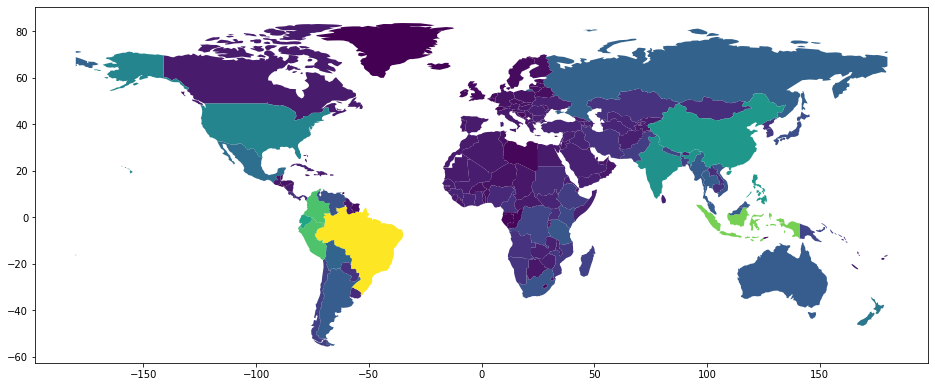

In [14]:
fig, ax = plt.subplots(1, figsize = (16, 8))

world_values.plot(column='Value', ax=ax)
plt.savefig('Plot/World4.jpg');

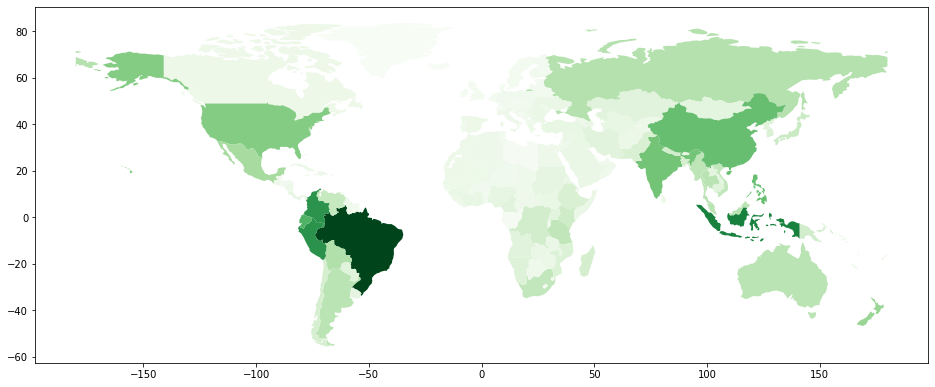

In [15]:
fig, ax = plt.subplots(1, figsize = (16, 8))


world_values.plot(column='Value', ax=ax, cmap='Greens')
plt.savefig('Plot/World5.jpg');

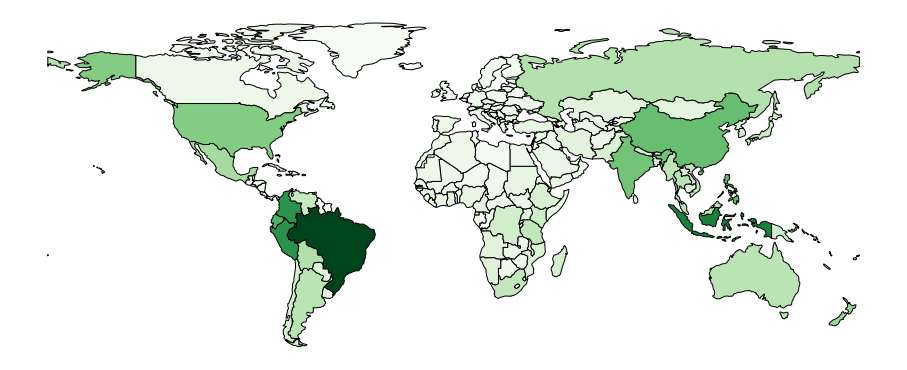

In [16]:
fig, ax = plt.subplots(1, figsize = (16, 8), facecolor='white')


world_values.plot(column='Value', ax=ax, cmap='Greens', edgecolors='black')

ax.axis('off')
plt.savefig('Plot/World6.jpg')
plt.show()


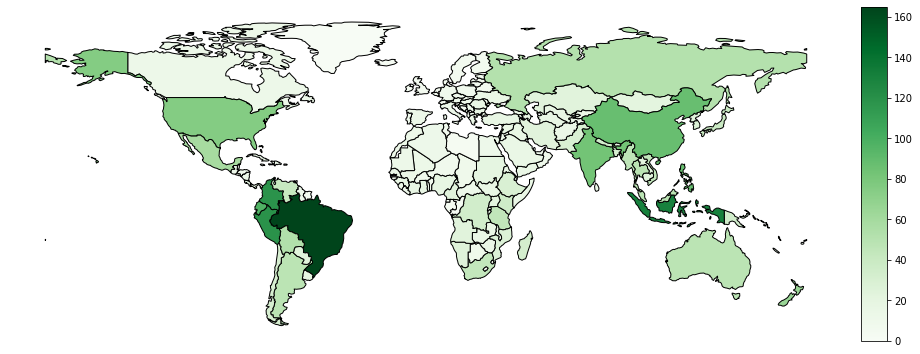

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, figsize = (16, 8), facecolor='white')

world_values.plot(column='Value', ax=ax, cmap='Greens', edgecolors='black')

#set an axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.05)

#color bar
vmax=world_values.Value.max()
mappable = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax)

ax.axis('off')
plt.savefig('Plot/World7.jpg')
plt.show()


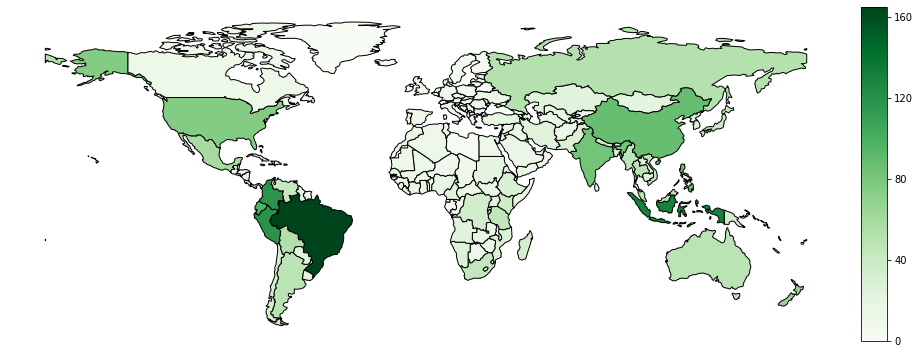

In [18]:
fig, ax = plt.subplots(1, figsize = (16, 8), facecolor='white')

world_values.plot(column='Value', ax=ax, cmap='Greens', edgecolors='black')

#set an axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.05)

#color bar
vmax=world_values.Value.max()
mappable = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax)

cbar.set_ticks(np.arange(0,vmax, 40))
cbar.ax.tick_params(labelsize=10)

ax.axis('off')
plt.savefig('Plot/World8.jpg')
plt.show()


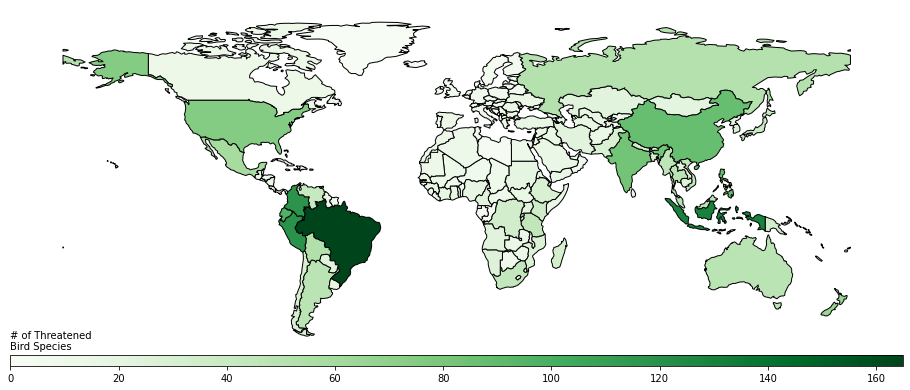

In [19]:
fig, ax = plt.subplots(1, figsize = (16, 8), facecolor='white')


world_values.plot(column='Value', ax=ax, cmap='Greens', edgecolors='black')

#set an axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='3%', pad=0.05)

#color bar
vmax=world_values.Value.max()
mappable = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.tick_params(labelsize=10)


ax.axis('off')
plt.title('# of Threatened\nBird Species', loc='left', fontsize=10)
plt.savefig('Plot/World9.jpg')
plt.show()
